### Objective : 
#### To apply Logistic Regression algorithm with L1 Regularizer on Amazon food reviews dataset for each of the vectorization below : 
                  1. Bag Of Words (BoW)
                  2. TermFrequency-InverseDocumentFrequency (TF-IDF)
                  3. Word2Vec (W2V)
                  4. AverageWord2Vec (AvgW2V)
                  
#### To determine the sentiment polarity: 
#### i,e.  Given a food review text, predict whether the score is Positive or Negative.
#### NOTE :
    1. Sort the dataset based on timestamp in ascending order.
    2. Split the dataset into Training (60%),Cross-validation (20%) and Test (20%) .
    3. Apply Elbow-Method, on the cross-validation set, to find optimal 'lambda' in Logistic Regression.
    4. Calculate C = Inverse(lambda), to be passed to the LR method in sklearn.
    5. Fit the model on the dataset X.
    6. For L1 Regularizer,Increase the value of lambda
        (a) report performance.
        (b) Report sparsity.
    7. Determine feature importance for positive and negative classes.
    8. Compute and report the following performance metrics for the vectorization mentioned above.
        (a) Accuracy
        (b) Precision
        (c) Recall
        (d) F1-Score
        (e) Confusion Matrix
    9.  Perform feature engineering / hyper-parameter tuning to make the model better by reducing 
        FalsePositives.
    10. Do sparsity and multicollinearity for any of the vectorizers. BoW or tf-idf is recommended.

    Author : Joseph M.T. Vijay
    Date   : 30-Nov-2018

#### Load the required libraries.

In [1]:
# Load the required libraries.
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
# Install prettytable
import sys
!{sys.executable} -m pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2

  Using cached prettytable-0.7.2.tar.bz2
  Running setup.py bdist_wheel for prettytable: started
  Running setup.py bdist_wheel for prettytable: finished with status 'done'
  Stored in directory: C:\Users\Vijay Joseph\AppData\Local\pip\Cache\wheels\29\73\c9\3e063a66859af18585f8e1439f92dcc27b8c13ae400bb8c89e
Successfully built prettytable


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#### Load the Pre-processed Amazon Reviews Dataset.

In [2]:
# Load the pre-processed Amazon food review dataset.
# Please note : the contents of the file "finalCleanedText" contains Text inclusive of summary comments 
# present in the Amazon food review dataset.

final = ''
final = pd.read_csv("finalCleanedText.csv")

#### Apply Time Based Sorting (TBS).

In [3]:
# Add a new column for TimeStamp that is of Datetime datatype,since the dataset's time column is of integer datatype.
import datetime

# Assign the Time column to a new variable.
final_timesplit = final['Time']

# Convert the datatype of the time column from integer to datetime.
final_timesplit = final_timesplit.apply(datetime.datetime.fromtimestamp)

# Create a new column to store the new time column whose datatype is datetime
final['TimeSplit']  = final_timesplit

# Sort the final dataset in descending order of time.
final_dataset = final.sort_values(['TimeSplit'],ascending=False)

#### Sample 100K points based on time based sorting

In [4]:
#Sample 100K points after time based sorting.
final = final_dataset[:100000]
# Store label info separately.
label = final['Score'][:100000]

In [5]:
# Print the shape of the input variables and output variables.
print(final.shape)
print(label.shape)

(100000, 14)
(100000,)


In [6]:
# The class label "Score" has distinct values as Positive and Negative, convert them to 1 for Postive and 0 for Negative.
print(label[:5])
Y = final['Score'].map({"positive":1,"negative":0})
print(Y[:5])

262240    positive
33119     positive
353804    negative
328939    negative
296377    positive
Name: Score, dtype: object
262240    1
33119     1
353804    0
328939    0
296377    1
Name: Score, dtype: int64


#### Split the data into Train, Cross-validation and Test dataset.
    ==> Train = First 60% of the sorted complete dataset.
    ==> CV    = Next  20% of the sorted complete dataset.
    ==> Test  = Last  20% of the sorted complete dataset.

In [7]:
# Assign the cleaned text and the class label for the split.
X = final['CleanedText']
Y = final['Score'].map({"positive":1,"negative":0})

# Split the dataset in the following ratios:
# Total row considered is 364171.

# Input split
X_train = X[0:60000]            #Train = First 60% of the sorted dataframe;
X_cv    = X[60000:80000]        #CV    = Next  20% of the sorted dataframe;
X_test  = X[80000:100000]       #Test  = Remaining 20% of the sorted dataframe.

#Class lable split.
Y_train = Y[0:60000]            #Train = First 60% of the sorted dataframe;
Y_cv    = Y[60000:80000]        #CV    = Next  20% of the sorted dataframe;
Y_test  = Y[80000:100000]       #Test  = Remainning 20% of the sorted dataframe.

In [8]:
# Load the prettytable
from prettytable import PrettyTable

# Instantiate the prettytable module.
# Table to summarize our final conclusion.
summaryTable = PrettyTable()
# Set the column names for the table.
summaryTable.field_names = ["Text-VectorizationType","Hyper-Paramter(lambda)","Performance Metric", "Value"]

# Table to list performance scores and sparsity as lambda increases.
lambdaVariationsTable = PrettyTable()
# Set the column names for the table.
lambdaVariationsTable.field_names = ["RowNum","Hyper-Paramter(lambda)","Performance Metric", "Value","Sparsity"]

### Vectorization Method : Bag Of Words (BoW)

#### Convert reviews present in trainingset into numeric vectors using Bag Of Words (BoW)

In [9]:
# Apply BoW vectorization.

#Instantiate the BoW vectorizer.
count_vect = CountVectorizer(dtype='float64',ngram_range=(1,2)) #in scikit-learn bi-gram

#Train you countvectorizer on the train data
final_counts = count_vect.fit_transform(X_train.values.astype('U'))

#Print the type,shape and unique words of the BoW vectorizer on the training set. 
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (60000, 901762)
the number of unique words  901762


#### Use the BoW vectorizer trained in the preceding step to convert CVset and Testset to vectors.

In [10]:
#Use the same vectorizer trained on the training set, on the cv set.
final_counts_cvset = count_vect.transform(X_cv.values)

#Print the type,shape and unique words of the BoW vectorizer on the testset. 
print("the type of count vectorizer ",type(final_counts_cvset))
print("the shape of out text BOW vectorizer ",final_counts_cvset.get_shape())
print("the number of unique words ", final_counts_cvset.get_shape()[1])

#Use the same vectorizer trained on the training set, on the test set.
final_counts_testset = count_vect.transform(X_test.values)

#Print the type,shape and unique words of the BoW vectorizer on the testset. 
print("the type of count vectorizer ",type(final_counts_testset))
print("the shape of out text BOW vectorizer ",final_counts_testset.get_shape())
print("the number of unique words ", final_counts_testset.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (20000, 901762)
the number of unique words  901762
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (20000, 901762)
the number of unique words  901762


#### Standardize Data

In [11]:
# Data-preprocessing: Normalizing the data

# Import the Normailizer module.
from sklearn.preprocessing import Normalizer

# Instantiate the Normailizer module.
normalizer = Normalizer()

#Standardize the normailizer on the train data.
X_train_stdzd = normalizer.fit_transform(final_counts)

#Standardize the normailizer on the cv data.
X_cv_stdzd = normalizer.transform(final_counts_cvset)

# use the same normalizer on the test set.
X_test_stdzd  = normalizer.transform(final_counts_testset) 

#### Hyper-Parameter Tuning : Using the cross-validation dataset to calculate the optimal 'lambda' of LogisticRegression in BoW case.

[6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]
[0.9605974136360876, 0.9617818889970788, 0.9661772904664561, 0.9748760114852519, 0.9687736433042162, 0.9473639885464039, 0.0, 0.82385]


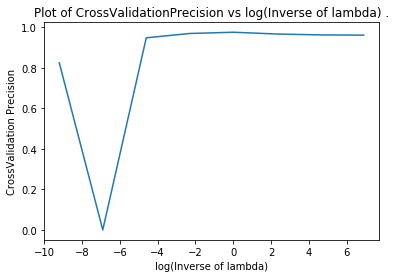

Starttime is : 2018-11-28 08:37:10.674850
Endtime   is : 2018-11-28 10:39:09.031481


In [14]:
# Import the LogisticRegression and precision modules.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Set the start time of the current cell run.
starttime_lr_bow = datetime.datetime.now()

# Set the range for the hyper-parameters.
# We Know from theory:
#          when lambda = 0, then model overfits
#          when lambda tends to infinity , then model underfits

# Experiment with different combination of C ranges.
# Here C = Inverse(Lambda) where lambda is the hyper-parameter of the LR model
#C = [100.0,10.0,1.0,0.1,0.01,0.001,0.0001,0.00001,0.000001]
#C = [100000000,10000000,1000000,100000,10000,1000,100,10,1,0.1,0.01,0.001]
#C = [10000000000,1000000000,100000000,10000000,1000000,1000,1.0,0.1,0.01,0.001,0.0001,0.00001]
#C = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]
#C = [1000,100,10,1,0.1,0.01,0.001,0.0001]
C = [150,15,1.5,0.15,0.015,0.0015,0.00015]

# Use the cross-validation dataset to determine the best hyper-parameter C.
# Loop through various values of C.
plot_X = []
plot_Y = []
for i in C:
    # Iterate through various values of C = inverse(lambda),
    lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                    C=(i),                   # use Inverse of Lambda.
                                    class_weight='balanced', # uses the values of y to automatically 
                                                             # adjust weights in the input
                                                             # data.
                                    solver='saga')           # solver = 'saga' because of high dimension
                                                             # and L1 regularizer.
    
    lr_optimal.fit(X_train_stdzd, Y_train)       # fitting the Logistic Regression model on the training
                                                 # set.
    Y_pred = lr_optimal.predict(X_cv_stdzd)      # predict the response from the Logistic Regression model
                                                 # on the cv set.
    plot_X.append(np.log(i))                     # plot log(InverseOfLambda) "C" in the x-axis.
    plot_Y.append(precision_score(Y_cv,Y_pred))  # plot precision score in the y-axis.

# print X,Y
print(plot_X)
print(plot_Y)

# Plot X-axis = log(C),Y-axis = precision to determine the best hyper-parameter.
plt.plot(plot_X,plot_Y)
plt.title("Plot of CrossValidationPrecision vs log(Inverse of lambda) .")  # Set the title of the plot.
plt.xlabel("log(Inverse of lambda)")                                       # Set the x label of the plot.
plt.ylabel("CrossValidation Precision")                                    # Set the y label of the plot.
plt.show()                                                                 # render the plot.

# Set the end time of the current cell run.
endtime_lr_bow = datetime.datetime.now()

# Print the cell run duration.
print("Starttime is : {}".format(starttime_lr_bow))
print("Endtime   is : {}".format(endtime_lr_bow))

In [ ]:
# Lambda Range : [150,15,1.5,0.15,0.015,0.0015,0.00015]
# [5.0106352940962555, 2.70805020110221, 0.4054651081081644, -1.8971199848858813, -4.199705077879927, -6.502290170873972, -8.804875263868018]
# [0.9609213565090555, 0.9635144281055805, 0.9755623257924418, 0.9696825827455237, 0.9529798141621275, 0.9405089965958826, 0.82385]

# Lambda Range : [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]
# [9.210340371976184, 6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]
# [0.9599830231007094, 0.9598422808613891, 0.9617070497990989, 0.9658696729435085, 0.9748760114852519, 0.9687736433042162, 0.9473639885464039, 0.0, 0.82385]

# Lambda Range : [1000,100,10,1,0.1,0.01,0.001,0.0001]
# [6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]
# [0.9605974136360876, 0.9617818889970788, 0.9661772904664561, 0.9748760114852519, 0.9687736433042162, 0.9473639885464039, 0.0, 0.82385]


In [16]:
print(np.exp(0.405))

1.499302500056767


In [12]:
# Print the shape of the Input features X and class label Y for training and test set.
print("Trainingset      X: {}".format(X_train_stdzd.shape))
#print("TrainingsetNoise X: {}".format(X_train_stdzd_withNoise.shape))
print("CVset            X: {}".format(X_cv_stdzd.shape))
print("Testset          X: {}".format(X_test_stdzd.shape))

print("Trainingset      Y: {}".format(Y_train.shape))
print("CVset            Y: {}".format(Y_cv.shape))
print("Testset          Y: {}".format(Y_test.shape))

Trainingset      X: (60000, 901762)
CVset            X: (20000, 901762)
Testset          X: (20000, 901762)
Trainingset      Y: (60000,)
CVset            Y: (20000,)
Testset          Y: (20000,)


#### Error plots for varying combination of lambda ranges.

#### Lambda range : 0 to 10000

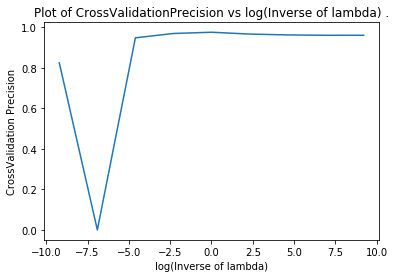

In [2]:
from IPython.display import Image 
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_10000_BoW_L1Reg.png')

#### Observations :
    We observe, the curve moving towards a uniform distribution @ lambda > 1.
    Here lambda ranges from 0 to 10000.

#### Lambda Range : 0 to 1000

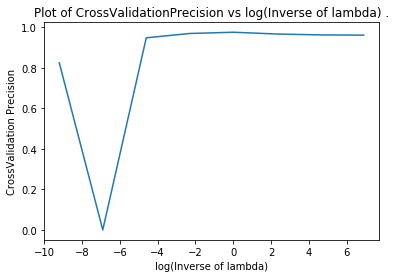

In [3]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_1000_BoW_L1Reg.png')

#### Observations :
    We observe, the curve moving uniformly when lambda > 1.
    Here lambda ranges from 0 to 1000.

#### Lambda range : 0.00015 to 150 

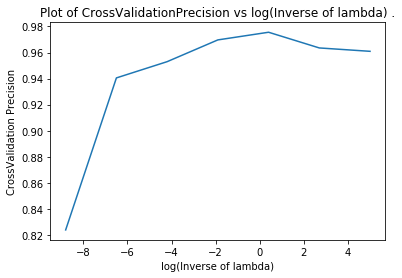

In [4]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_150_BoW_L1Reg.png')

#### Observations :
    The cross-validation precision is maximum when log(lambda) ~= 0.405 .
    Therefore lambda = exponential(log(lambda)) = np.exp(0.405) = 1.50
    Here lambda ranges from 0.00015 to 150.

#### Hyper-parameter Choice : 
      Based on the CV plots for varying combination of lambda ranges, lambda = 1.5 when lambda range is between 0.00015 and 150 is the best choice.

#### Train and Fit the Logistic Regression model in the training set. Compute the performance metrics by predicting the model on the test set.

In [14]:
# ============================== LR with lambda = optimal lambda ===============================================
# Import the LogisticRegression and precision modules.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score


# Set the start time of the current cell run.
starttime_lr_bow = datetime.datetime.now()

# instantiate the Logistic Regression model with lambda = 1.50 based on the above error plots .
lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                C=(1.50),                # use Inverse of Lambda.
                                class_weight='balanced', # uses the values of y to automatically adjust 
                                                         # weights in the input 
                                                         # data, since we have class imbalance.
                                solver='saga')           # solver = 'saga' because of high dimension and 
                                                         # L1 regularizer.

lr_optimal.fit(X_train_stdzd, Y_train)           # fitting the Logistic Regression model.
Y_pred_test = lr_optimal.predict(X_test_stdzd)   # predict,response from the Logistic Regression model.

# Set the end time of the current cell run.
endtime_lr_bow = datetime.datetime.now()

# Print the cell run duration.
print("Starttime : {}".format(starttime_lr_bow))
print("Endtime   : {}".format(endtime_lr_bow))

Starttime : 2018-11-30 15:46:57.285775
Endtime   : 2018-11-30 15:48:44.617388


#### Plot the classifier performance metrics.

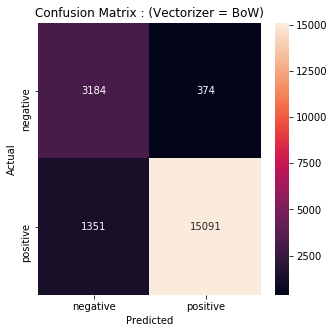

In [15]:
# evaluate the model and report the metrics.
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_pred_test)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d'
            ,xticklabels=['negative','positive'], yticklabels=['negative','positive'])
plt.title('Confusion Matrix : (Vectorizer = BoW)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
#Class composition in the testset.
dfYTest = pd.DataFrame(list(Y_test),columns=['Comment'])
#print(list(Y_test))
print(dfYTest["Comment"].value_counts())

1    16442
0     3558
Name: Comment, dtype: int64


In [17]:
# Load the classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Load the prettytable
from prettytable import PrettyTable

# Instantiate the prettytable module.
x = PrettyTable()
# Set the column names for the table.
x.field_names = ["Text-VectorizationType","Performance Metric", "Value"]

# Add the classification metrics to the table.
x.add_row(['BoW','Accuracy',accuracy_score(Y_test,Y_pred_test)])
x.add_row(['-','Precision',precision_score(Y_test,Y_pred_test)])
x.add_row(['-','Recall',recall_score(Y_test,Y_pred_test)])
x.add_row(['-','F1 Score',f1_score(Y_test,Y_pred_test)])
x.add_row(['-','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
x.add_row(['----------','-----------','----------'])

# Add the classification metrics to the final summary table.
summaryTable.add_row(['BoW','1.50','Accuracy',accuracy_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','Precision',precision_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','Recall',recall_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','F1 Score',f1_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
summaryTable.add_row(['----------','-----------','----------','----------'])


# Apply data alignment.
x.align["Value"] = "l"

# Print the table.
print("Performance Metrics :")
print(x)

Performance Metrics :
+------------------------+--------------------+--------------------+
| Text-VectorizationType | Performance Metric | Value              |
+------------------------+--------------------+--------------------+
|          BoW           |      Accuracy      | 0.91375            |
|           -            |     Precision      | 0.9758163595215001 |
|           -            |       Recall       | 0.9178323804889916 |
|           -            |      F1 Score      | 0.9459366283260727 |
|           -            |  ConfusionMatrix   | [[ 3184   374]     |
|                        |                    |  [ 1351 15091]]    |
|       ----------       |    -----------     | ----------         |
+------------------------+--------------------+--------------------+


#### Report performance and sparsity by varying the value of lambda.

####  When lambda = 1.5, get the performance score and sparsity.

In [18]:
# Get sparsity when lambda = 1.5
score = precision_score(Y_test,Y_pred_test)   # Get precision score from the fitted model.
w = lr_optimal.coef_                          # Get weights from the fitted model.
wtBoW = w                                     # Get weights from the fitted model.
sparsity = np.count_nonzero(w)                # Get sparsity from the fitted model.
sparseFeatures = np.nonzero(w)[1]             # Get sparse features from the fitted model.

# Add the performance score and sparsity by varying lambda to the variations table.
lambdaVariationsTable.add_row(['1.','01.50','Precision',score,sparsity])

####  When lambda = 15, get the performance score and sparsity.

In [19]:
# ============================== LR with lambda = optimal lambda ===============================================

# instantiate the Logistic Regression model with lambda = 15.0 .
lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                C=(15.0),                # use Inverse of Lambda.
                                class_weight='balanced', # uses the values of y to automatically adjust 
                                                         # weights in the input 
                                                         # data, since we have class imbalance.
                                solver='saga')           # solver = 'saga' because of high dimension and
                                                         # L1 regularizer.

lr_optimal.fit(X_train_stdzd, Y_train)           # fitting the Logistic Regression model.
Y_pred_test = lr_optimal.predict(X_test_stdzd)   # predict the response from the Logistic Regression 
                                                 # model.

# Get sparsity when lambda = 15.0
score = precision_score(Y_test,Y_pred_test)   # Get precision score from the fitted model.
w = lr_optimal.coef_                          # Get weights from the fitted model.
sparsity = np.count_nonzero(w)                # Get sparsity from the fitted model.

# Add the performance score and sparsity by varying lambda to the variations table.
lambdaVariationsTable.add_row(['2.','15.0','Precision',score,sparsity])


####  When lambda = 30, get the performance score and sparsity.

In [20]:
# ============================== LR with lambda = optimal lambda ===============================================

# instantiate the Logistic Regression model with lambda = 30.0 .
lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                C=(30.0),                # use Inverse of Lambda.
                                class_weight='balanced', # uses the values of y to automatically adjust 
                                                         # weights in the input 
                                                         # data, since we have class imbalance.
                                solver='saga')           # solver = 'saga' because of high dimension and 
                                                         # L1 regularizer.

lr_optimal.fit(X_train_stdzd, Y_train)           # fitting the Logistic Regression model.
Y_pred_test = lr_optimal.predict(X_test_stdzd)   # predict the response from the Logistic Regression 
                                                 # model.

# Get sparsity when lambda = 30.0
score = precision_score(Y_test,Y_pred_test)   # Get precision score from the fitted model.
w = lr_optimal.coef_                          # Get weights from the fitted model.
sparsity = np.count_nonzero(w)                # Get sparsity from the fitted model.

# Add the performance score and sparsity by varying lambda to the variations table.
lambdaVariationsTable.add_row(['3.','30.0','Precision',score,sparsity])


####  When lambda = 45, get the performance score and sparsity.

In [21]:
# ============================== LR with lambda = optimal lambda ===============================================

# instantiate the Logistic Regression model with lambda = 45.0 .
lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                C=(45.0),                # use Inverse of Lambda.
                                class_weight='balanced', # uses the values of y to automatically adjust 
                                                         # weights in the input 
                                                         # data, since we have class imbalance.
                                solver='saga')           # solver = 'saga' because of high dimension and 
                                                         # L1 regularizer.

lr_optimal.fit(X_train_stdzd, Y_train)           # fitting the Logistic Regression model.
Y_pred_test = lr_optimal.predict(X_test_stdzd)   # predict the response from the Logistic Regression 
                                                 # model.

# Get sparsity when lambda = 45.0
score = precision_score(Y_test,Y_pred_test)   # Get precision score from the fitted model.
w = lr_optimal.coef_                          # Get weights from the fitted model.
sparsity = np.count_nonzero(w)                # Get sparsity from the fitted model.

# Add the performance score and sparsity by varying lambda to the variations table.
lambdaVariationsTable.add_row(['4.','45.0','Precision',score,sparsity])


####  When lambda = 90, get the performance score and sparsity.

In [22]:
# ============================== LR with lambda = optimal lambda ===============================================

# instantiate the Logistic Regression model with lambda = 90.0 .
lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                C=(90.0),                # use Inverse of Lambda.
                                class_weight='balanced', # uses the values of y to automatically adjust 
                                                         # weights in the input 
                                                         # data, since we have class imbalance.
                                solver='saga')           # solver = 'saga' because of high dimension and
                                                         # L1 regularizer.

lr_optimal.fit(X_train_stdzd, Y_train)           # fitting the Logistic Regression model.
Y_pred_test = lr_optimal.predict(X_test_stdzd)   # predict the response from the Logistic Regression 
                                                 # model.

# Get sparsity when lambda = 90.0
score = precision_score(Y_test,Y_pred_test)   # Get precision score from the fitted model.
w = lr_optimal.coef_                          # Get weights from the fitted model.
sparsity = np.count_nonzero(w)                # Get sparsity from the fitted model.

# Add the performance score and sparsity by varying lambda to the variations table.
lambdaVariationsTable.add_row(['5.','90.0','Precision',score,sparsity])


####  When lambda = 150, get the performance score and sparsity.

In [23]:
# ============================== LR with lambda = optimal lambda ===============================================

# instantiate the Logistic Regression model with lambda = 150.0 .
lr_optimal = LogisticRegression(penalty='l1',             # use L1 regularizer.
                                C=(150.0),                # use Inverse of Lambda.
                                class_weight='balanced',  # uses the values of y to automatically adjust
                                                          # weights in the input 
                                                          # data, since we have class imbalance.
                                solver='saga')            # solver = 'saga' because of high dimension and
                                                          # L1 regularizer.

lr_optimal.fit(X_train_stdzd, Y_train)           # fitting the Logistic Regression model.
Y_pred_test = lr_optimal.predict(X_test_stdzd)   # predict the response from the Logistic Regression
                                                 # model.

# Get sparsity when lambda = 150.0
score = precision_score(Y_test,Y_pred_test)   # Get precision score from the fitted model.
w = lr_optimal.coef_                          # Get weights from the fitted model.
sparsity = np.count_nonzero(w)                # Get sparsity from the fitted model.

# Add the performance score and sparsity by varying lambda to the variations table.
lambdaVariationsTable.add_row(['6.','150.0','Precision',score,sparsity])


#### Report model performance and sparsity for varying values of lambda.

In [24]:
# Apply data alignment.
lambdaVariationsTable.align["Value"] = "l"
lambdaVariationsTable.align["Sparsity"] = "r"

# Print the table.
print("Report scores and sparsity, while varying lambda :")
print(lambdaVariationsTable)

Report scores and sparsity, while varying lambda :
+--------+------------------------+--------------------+--------------------+----------+
| RowNum | Hyper-Paramter(lambda) | Performance Metric | Value              | Sparsity |
+--------+------------------------+--------------------+--------------------+----------+
|   1.   |         01.50          |     Precision      | 0.9758163595215001 |     1810 |
|   2.   |          15.0          |     Precision      | 0.9644977733795151 |    21166 |
|   3.   |          30.0          |     Precision      | 0.9621495613766027 |    44423 |
|   4.   |          45.0          |     Precision      | 0.9614796698257414 |    66488 |
|   5.   |          90.0          |     Precision      | 0.9607436757086254 |   125614 |
|   6.   |         150.0          |     Precision      | 0.9605527485237718 |   180317 |
+--------+------------------------+--------------------+--------------------+----------+


#### We observe from the above table, that, as Lambda increases,
    ==> performance decreases 
    ==> sparsity increases

#### Feature Importance : Logic for Class based feature importance.
####            Look at the original weights, a negative coefficient means that higher value of the corresponding feature pushes the classification more towards the negative class and vice-versa.

#### Use the sparse vector to get the (weights, feature) combo and load them into a dataframe.

In [25]:
# get the weights W for the dataset X_test_stdzd.
wtBoW = lr_optimal.coef_

# nested tuple to store the indices where weights qualify a threshold.
tupIndicesNonZero = np.nonzero(wtBoW)

# get the indices of the words that qualify the weight criteria.
indices_nonzero = tupIndicesNonZero[1][:]

# print the weights of words that qualify the weight criteria.
weightVector = wtBoW[tupIndicesNonZero]

# print the features that meet the criteria.
wordVector = np.take(count_vect.get_feature_names(), indices_nonzero)

# Prepare the data from the columnIndex,weightvector and wordvector.
lstData = list(zip(indices_nonzero,weightVector,wordVector))

# create a dataframe to store the columnindex,weights,words of the text corpus.
dfTopWords = pd.DataFrame(data=lstData,columns=['ColumnIndex','Weight','Word'])

# Print the top 10 rows from the resultant dataframe.
print(dfTopWords.sort_values(['Weight'],ascending=False).head(10))


        ColumnIndex     Weight             Word
9295          47909  32.530872           awesom
74387        376055  31.690837   high recommend
52692        267021  26.669181            excel
176839       884543  26.436914  wont disappoint
115220       576670  23.605274          perfect
40745        206555  23.538249           delici
180075       899804  23.238556            yummi
55092        279633  22.944970          fantast
180060       899481  22.345088              yum
54321        275017  21.772284            fabul


#### Positive Class :

In [26]:
# Get the features with their weights.
# Currently returns the top 10 features.

# For Positive Class : Get the features with their weights.
dfTopWords[['ColumnIndex','Word','Weight'
          ]][(dfTopWords['Weight'] > 0.00)].sort_values(['Weight'],ascending=False).head(10)


,ColumnIndex,Word,Weight
9295,47909,awesom,32.530872
74387,376055,high recommend,31.690837
52692,267021,excel,26.669181
176839,884543,wont disappoint,26.436914
115220,576670,perfect,23.605274
40745,206555,delici,23.538249
180075,899804,yummi,23.238556
55092,279633,fantast,22.944970
180060,899481,yum,22.345088
54321,275017,fabul,21.772284


#### Negative Class :

In [27]:
# Get the features with their weights, excluding features that were found to be Multicollinear.
# Currently returns the top 10 features.

# For Negative Class : Get the features with their weights, excluding features that were found 
# to be Multicollinear.
dfTopWords[['ColumnIndex','Word','Weight'
          ]][(dfTopWords['Weight'] < 0.00)].sort_values(['Weight'],ascending=False).head(10)


,ColumnIndex,Word,Weight
21717,109384,buy surpris,-1.047886e-08
131671,658461,review realli,-5.425703e-08
163243,817842,top two,-7.571426e-08
57882,294645,finish salt,-1.128129e-07
59480,301134,flavor two,-1.130696e-07
88511,447557,like pictur,-1.956571e-07
69541,350497,great salad,-2.150504e-07
156953,788068,tea absolut,-2.321840e-07
57319,292094,find good,-2.848419e-07
19681,99547,brink,-3.688939e-07


#### CONCLUSION :

#### Performance Metrics 

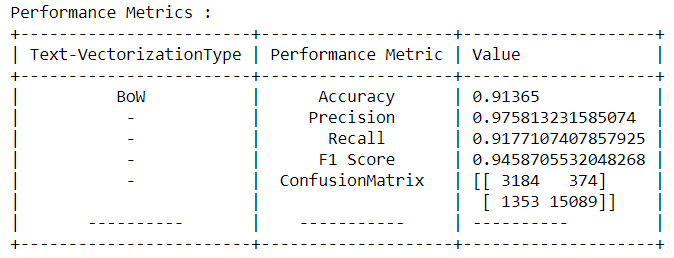

In [5]:
Image(filename='D:\Plot\ConfusionMatrix_L1Regularizer_BoW.PNG')

#### We see good precision score for the LR model with L1 Regularizer. The FalsePositive values is acceptable while FalseNegative is a concern. The text review comment has been enriched by adding contents of summary column from the Amazon Food Reviews dataset.

### Vectorization Method : TermFrequency-InverseDocumentFrequency (TF_IDF)

#### Convert review text into numeric vectors using TF_IDF

In [28]:
#TF-IDF
# Apply TF-IDF vectorization only on the trainingset.
tf_idf_vect = TfidfVectorizer(dtype='float64',ngram_range=(1,2))

In [29]:
#Train you tf-idf vectorizer on the train data (.fit_transform()) and 
#use the same vectorizer on the test set as well (.transform())
final_tf_idf = tf_idf_vect.fit_transform(X_train.values.astype('U'))

print("the type of TIDF vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of TIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (60000, 901762)
the number of unique words including both unigrams and bigrams  901762


#### Use the TF-IDF vectorizer trained in the preceding step to convert cvset and testset to vectors.

In [30]:
#use the same countvectorizer on the cvset and testset.
final_tf_idf_cvset = tf_idf_vect.transform(X_cv.values)
print("the type of TFIDF vectorizer ",type(final_tf_idf_cvset))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_cvset.get_shape())
print("the number of unique words ", final_tf_idf_cvset.get_shape()[1])

#use the same countvectorizer on the testset.
final_tf_idf_testset = tf_idf_vect.transform(X_test.values)
print("the type of TFIDF vectorizer ",type(final_tf_idf_testset))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_testset.get_shape())
print("the number of unique words ", final_tf_idf_testset.get_shape()[1])

the type of TFIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (20000, 901762)
the number of unique words  901762
the type of TFIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (20000, 901762)
the number of unique words  901762


#### Standardize / Normalize the data

In [31]:
# Data-preprocessing: Normalizing the data
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

#Standardize on the train data. 
X_train_stdzd = normalizer.fit_transform(final_tf_idf)

#Standardize on the cv and test data.
X_cv_stdzd    = normalizer.transform(final_tf_idf_cvset)     #use the same Normalizer on the cvset.
X_test_stdzd  = normalizer.transform(final_tf_idf_testset)   #use the same Normalizer on the testset.

#### Hyper-Parameter Tuning : Using the cross-validation dataset to calculate the optimal 'lambda' of LogisticRegression in TF-IDF case.

[5.0106352940962555, 2.70805020110221, 0.4054651081081644, -1.8971199848858813, -4.199705077879927, -6.502290170873972]
[0.9601475568456701, 0.963815588073226, 0.9751821053310127, 0.9684353741496599, 0.9445610353270374, 0.82385]


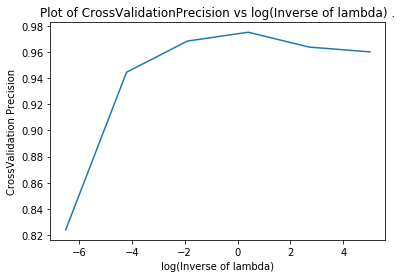

Starttime is : 2018-11-29 22:15:36.459143
Endtime   is : 2018-11-30 09:36:36.763989


In [15]:
# Import the LogisticRegression and precision modules.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Set the start time of the current cell run.
starttime_lr_tfidf = datetime.datetime.now()

# Set the range for the hyper-parameters.
# We Know from theory:
#          when lambda = 0, then model overfits
#          when lambda tends to infinity , then model underfits

# Experiment with different combination of C ranges.
# Here C = Inverse(Lambda) where lambda is the hyper-parameter of the LR model
#C = [100.0,10.0,1.0,0.1,0.01,0.001,0.0001,0.00001,0.000001]
#C = [10000,1000,100,10,1,0.1,0.01,0.001]
#C = [1000,100,10,1,0.1,0.01,0.001,0.0001]
C = [150,15,1.5,0.15,0.015,0.0015]

# Use the cross-validation dataset to determine the best hyper-parameter C.
# Loop through various values of C.
plot_X = []
plot_Y = []
for i in C:                                                  # Iterate through various values of 
                                                             # C = inverse(lambda).
    lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                    C=(i),                   # use Inverse of Lambda.
                                    class_weight='balanced', # uses the values of y to automatically
                                                             # adjust weights in the input 
                                                             # data, since we have class imbalance.
                                    solver='saga')           # solver = 'saga' because of high dimension
                                                             # and L1 regularizer.
    
    lr_optimal.fit(X_train_stdzd, Y_train)       # fitting the Logistic Regression model on the
                                                 # training set.
    Y_pred = lr_optimal.predict(X_cv_stdzd)      # predict the response from the Logistic Regression 
                                                 # model on the cv set.
    plot_X.append(np.log(i))                     # plot log(InverseOfLambda) "C" in the x-axis.
    plot_Y.append(precision_score(Y_cv,Y_pred))  # plot precision score in the y-axis.

#print X,Y
print(plot_X)
print(plot_Y)

# Plot X-axis = log(C),Y-axis = precision, to determine the best hyper-parameter.
plt.plot(plot_X,plot_Y)
plt.title("Plot of CrossValidationPrecision vs log(Inverse of lambda) .")  # Set the title of the plot.
plt.xlabel("log(Inverse of lambda)")                                       # Set the x label of the plot.
plt.ylabel("CrossValidation Precision")                                    # Set the y label of the plot.
plt.show()                                                                 # render the plot.

# Set the end time of the current cell run.
endtime_lr_tfidf = datetime.datetime.now()

# Print the cell run duration.
print("Starttime is : {}".format(starttime_lr_tfidf))
print("Endtime   is : {}".format(endtime_lr_tfidf))

In [ ]:
# Lambda Range : [10000,1000,100,10,1,0.1,0.01,0.001]
# [9.210340371976184, 6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137]
# [0.9589941506361936, 0.9588586595885866, 0.9602444632699988, 0.9649975393700787, 0.9748182762201454, 0.9665600667408232, 0.9356604358153465, 0.0]

# Lambda Range : [1000,100,10,1,0.1,0.01,0.001]
# [6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]
# [0.9592760180995475, 0.9600992976507629, 0.9649360236220472, 0.9748182762201454, 0.9665554164928383, 0.9356005788712012, 0.82385, 0.0]

# Lambda Range : [150,15,1.5,0.15,0.015,0.0015]
# [5.0106352940962555, 2.70805020110221, 0.4054651081081644, -1.8971199848858813, -4.199705077879927, -6.502290170873972]
# [0.9601475568456701, 0.963815588073226, 0.9751821053310127, 0.9684353741496599, 0.9445610353270374, 0.82385]


In [16]:
np.exp(0.40)

1.4918246976412703

In [32]:
# Print the shape of the Input features X and class label Y for training and test set.
print("Trainingset      X: {}".format(X_train_stdzd.shape))
print("CVset            X: {}".format(X_cv_stdzd.shape))
print("Testset          X: {}".format(X_test_stdzd.shape))

print("Trainingset      Y: {}".format(Y_train.shape))
print("CVset            Y: {}".format(Y_cv.shape))
print("Testset          Y: {}".format(Y_test.shape))

Trainingset      X: (60000, 901762)
CVset            X: (20000, 901762)
Testset          X: (20000, 901762)
Trainingset      Y: (60000,)
CVset            Y: (20000,)
Testset          Y: (20000,)


#### Plots for varying combination of lambda ranges.

#### Lambda range : 100 to 10000

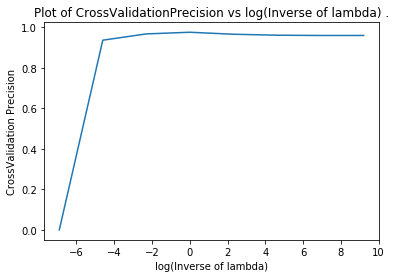

In [6]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_10000_TFIDF_L1Reg.png')

#### Observations :
    We observe, the curve reaches a mximum value at lambda ~= 1.0
    Here lambda ranges from 0 to 10000.

#### Lambda Range : 0 to 1000

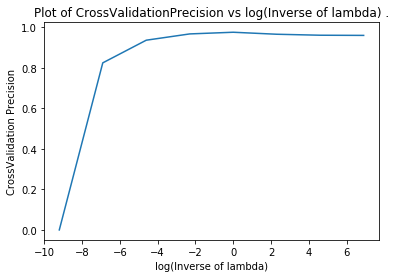

In [7]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_1000_TFIDF_L1Reg.png')

#### Observations :
    We observe, the curve reaches maximum at lambda = 1.0 .
    Here lambda ranges from 0 to 1000.

#### Lambda range : 0 to 150 

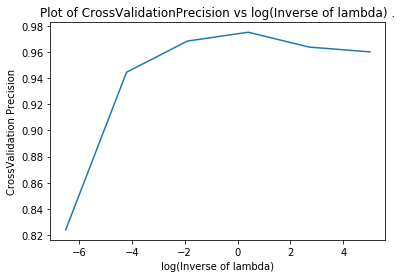

In [8]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_150_TFIDF_L1Reg.png')

#### Observations :
    The cross-validation precision is maximum when lambda ~= -1.5 .
    Here lambda ranges from 0 to 150.

#### Hyper-parameter Choice : 
      Based on the CV plots for varying combination of lambda ranges, lambda = 1.50 when lambda range is between 0 and 150 is the best choice.

#### Fit the Logistic Regression model in TF-IDF case in the test set and compute the error metrics.

In [33]:
# ============================== LR with lambda = optimal lambda ===============================================

# Set the start time of the current cell run.
starttime_lr_tfidf = datetime.datetime.now()

# instantiate the Logistic Regression model with lambda = 1.50 based on the above error plots .
lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                C=(1.50),                # use Inverse of Lambda.
                                class_weight='balanced', # uses the values of y to automatically adjust 
                                                         # weights in the input
                                                         # data, since we have class imbalance.
                                solver='saga')           # solver = 'saga' because of high dimension and
                                                         # L1 regularizer.

lr_optimal.fit(X_train_stdzd, Y_train)           # fitting the Logistic Regression model.
Y_pred_test = lr_optimal.predict(X_test_stdzd)   # predict the response from the Logistic Regression
                                                 # model.

# Set the end time of the current cell run.
endtime_lr_tfidf = datetime.datetime.now()

# Print the cell run duration.
print("Starttime : {}".format(starttime_lr_tfidf))
print("Endtime   : {}".format(endtime_lr_tfidf))

Starttime : 2018-11-30 17:43:03.568885
Endtime   : 2018-11-30 17:43:53.537620


#### Plot the classifier performance metrics.

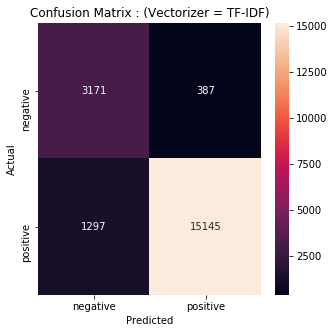

In [34]:
# evaluate the model and report the metrics.
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_pred_test)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d'
            ,xticklabels=['negative','positive'], yticklabels=['negative','positive'])
plt.title('Confusion Matrix : (Vectorizer = TF-IDF)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [35]:
#Class composition in the testset.
dfYTest = pd.DataFrame(list(Y_test),columns=['Comment'])
#print(list(Y_test))
print(dfYTest["Comment"].value_counts())

1    16442
0     3558
Name: Comment, dtype: int64


In [36]:
# Load the classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Load the prettytable
from prettytable import PrettyTable

# Instantiate the prettytable module.
x = PrettyTable()
# Set the column names for the table.
x.field_names = ["Text-VectorizationType","Performance Metric", "Value"]

# Add the classification metrics to the table.
x.add_row(['TFIDF','Accuracy',accuracy_score(Y_test,Y_pred_test)])
x.add_row(['-','Precision',precision_score(Y_test,Y_pred_test)])
x.add_row(['-','Recall',recall_score(Y_test,Y_pred_test)])
x.add_row(['-','F1 Score',f1_score(Y_test,Y_pred_test)])
x.add_row(['-','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
x.add_row(['----------','-----------','----------'])

# Add the classification metrics to the final summary table.
summaryTable.add_row(['TFIDF','1.50','Accuracy',accuracy_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','Precision',precision_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','Recall',recall_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','F1 Score',f1_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
summaryTable.add_row(['----------','-----------','----------','----------'])


# Apply data alignment.
x.align["Value"] = "l"

# Print the table.
print("Performance Metrics :")
print(x)

Performance Metrics :
+------------------------+--------------------+--------------------+
| Text-VectorizationType | Performance Metric | Value              |
+------------------------+--------------------+--------------------+
|         TFIDF          |      Accuracy      | 0.9158             |
|           -            |     Precision      | 0.9750836981715169 |
|           -            |       Recall       | 0.921116652475368  |
|           -            |      F1 Score      | 0.9473322074185275 |
|           -            |  ConfusionMatrix   | [[ 3171   387]     |
|                        |                    |  [ 1297 15145]]    |
|       ----------       |    -----------     | ----------         |
+------------------------+--------------------+--------------------+


#### Use the weight vector to determine class based Feature Importance. 

In [37]:
# get the weights W for the dataset X_test_stdzd.
wtTFIDF = lr_optimal.coef_

# nested tuple to store the indices where weights qualify a threshold.
tupIndicesNonZero = np.nonzero(wtTFIDF)

# get the indices of the words that qualify the weight criteria.
indices_nonzero = tupIndicesNonZero[1][:]

# print the weights of words that qualify the weight criteria.
weightVector = wtTFIDF[tupIndicesNonZero]

# print the features that meet the criteria.
wordVector = np.take(tf_idf_vect.get_feature_names(), indices_nonzero)

# Prepare the data from the columnIndex,weightvector and wordvector.
lstData = list(zip(indices_nonzero,weightVector,wordVector))

# create a dataframe to store the columnindex,weights,words of the text corpus.
dfTopWords = pd.DataFrame(data=lstData,columns=['ColumnIndex','Weight','Word'])

# Print the top 10 rows from the resultant dataframe.
print(dfTopWords.sort_values(['Weight'],ascending=False).head(10))


      ColumnIndex     Weight             Word
781        348640  31.358375            great
575        267021  28.920061            excel
863        376055  28.860045   high recommend
86          47909  27.666672           awesom
429        206555  27.273732           delici
1310       576670  26.714435          perfect
1065       462987  26.077715             love
122         69464  25.592504             best
1934       884543  20.092477  wont disappoint
1993       899804  20.063034            yummi


#### Feature Importance : Logic for Class based feature importance.
####            Look at the original weights, a negative coefficient means that higher value of the corresponding feature pushes the classification more towards the negative class and vice-versa.

#### Positive Class :

In [38]:
# Get the features with their weights.
# Currently returns the top 10 features.

# For Positive Class : Get the features with their weights, excluding features that were found to be
# Multicollinear.
dfTopWords[['ColumnIndex','Word','Weight'
          ]][(dfTopWords['Weight'] > 0.00)].sort_values(['Weight'],ascending=False).head(10)


,ColumnIndex,Word,Weight
781,348640,great,31.358375
575,267021,excel,28.920061
863,376055,high recommend,28.860045
86,47909,awesom,27.666672
429,206555,delici,27.273732
1310,576670,perfect,26.714435
1065,462987,love,26.077715
122,69464,best,25.592504
1934,884543,wont disappoint,20.092477
1993,899804,yummi,20.063034


#### Negative Class :

In [39]:
# Get the features with their weights.
# Currently returns the top 10 features.

# For Negative Class : Get the features with their weights, excluding features that were found to be
# Multicollinear.
dfTopWords[['ColumnIndex','Word','Weight'
          ]][(dfTopWords['Weight'] < 0.00)].sort_values(['Weight'],ascending=False).head(10)


,ColumnIndex,Word,Weight
1753,805292,though tea,-0.000709
461,220530,dirti,-0.000809
1216,524319,next day,-0.000934
143,77951,bite,-0.001124
1349,599082,pouch,-0.001243
523,238295,drug test,-0.006454
159,84811,bone,-0.007301
473,224968,dissatisfi,-0.010204
649,297359,fix,-0.010434
276,135536,cheribundi,-0.012705


#### CONCLUSION :

#### Performance Metrics 

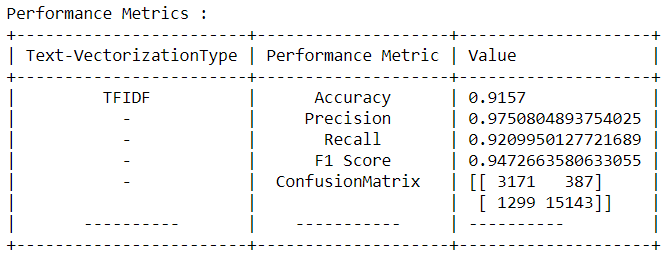

In [9]:
Image(filename='D:\Plot\ConfusionMatrix_L1Regularizer_TFIDF.PNG')

#### We see good precision score for the LR model with L1 Regularizer. The FalsePositive values is acceptable while FalseNegative is a concern. The text review comment has been enriched by adding contents of summary column from the Amazon Food Reviews dataset.

### Vectorization Method : Average Word2Vec : Avg W2V
#### Convert review text into numeric vectors using Avg W2V

In [40]:
# Load the necessary modules of Word2Vec
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tqdm

from tqdm import tqdm # for displaying progress bar.

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [41]:
# Train your own Word2Vec model using your own text training corpus.
# Train Word2Vec on training set alone.
i=0
list_of_sent=[]  # List to store the sentence from the review comments.

# Loop through all the Amazon Food Review comments, one comment at a time.
for sent in tqdm(X_train.values.astype('U')):
    list_of_sent.append(sent.split())         # From the Review, split it into individual sentence and add to the list.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [00:00<00:00, 66380.43it/s]


#### Train the Word2Vec model on the training set alone.

In [42]:
# min_count = 5 considers only words that occured atleast 5 times

# Instantiate the Word2Vec vectorizer.

# Word2Vec(list,word_repeat_count,dimension_of_each_word_vector,Number_of_Processor_cores)
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

# Store the word vocabulary.
w2v_words = list(w2v_model.wv.vocab)

# Print the Word vector.
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  10247
sample words  ['big', 'lover', 'fig', 'jam', 'uniqu', 'flavor', 'kind', 'mix', 'light', 'dark', 'mission', 'must', 'tri', 'awsom', 'great', 'product', 'good', 'price', 'definit', 'order', 'use', 'bottl', 'empti', 'excel', 'expect', 'box', 'full', 'fortun', 'cooki', 'like', 'one', 'nonetheless', 'got', 'small', 'tast', 'weird', 'okay', 'best', 'ever', 'review', 'amazon', 'check', 'label', 'contain', 'sure', 'enough', 'propylen', 'glycol', 'top', 'ingredi']


#### Compute the average Word2Vec for each review in the training set.

In [43]:
# average Word2Vec
# Avg. Word2Vec = (W2V(w1)+W2V(w2)+W2V(w3)+...... +W2V(w364171)) / 364171
# compute average word2vec for each review.
sent_vectors = [];                     # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent):        # for each review/sentence in the training set
    sent_vec = np.zeros(50)            # as word vectors are of zero length
    cnt_words =0;                      # num of words with a valid vector in the sentence/review
    for word in sent:                  # for each word in a review/sentence
        if word in w2v_words:          # if the word exists in the vocabulary
            vec = w2v_model.wv[word]   # convert the word to vector
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print('The total number of words is {}'.format(len(sent_vectors)))
print('The dimension of each word vector is {}'.format(len(sent_vectors[0])))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [00:52<00:00, 1144.72it/s]


The total number of words is 60000
The dimension of each word vector is 50


#### Build the text corpus of the cross-validation and test set.

In [44]:
# Build the cross-validation text corpus.
i=0
list_of_sent_cv=[]   # List to store the sentence from the review comments.

# Loop through all the Amazon Food Review comments, one comment at a time.
for sent in tqdm(X_cv.values):
    list_of_sent_cv.append(sent.split())     # From the Review, split it into individual sentence and add to the list.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 196604.62it/s]


In [45]:
# Build the test text corpus.
i=0
list_of_sent_test=[]  # List to store the sentence from the review comments.

# Loop through all the Amazon Food Review comments, one comment at a time.
for sent in tqdm(X_test.values):
    list_of_sent_test.append(sent.split())    # From the Review, split it into individual sentence and add to the list.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 222822.16it/s]


#### Use the trained word2vec model to compute the average Word2Vec for each review in the cross-validation and test set.

In [46]:
# CROSS-VALIDATION :

# average Word2Vec
# Avg. Word2Vec = (W2V(w1)+W2V(w2)+W2V(w3)+...... +W2V(w364171)) / 364171
# compute average word2vec for each review.
sent_vectors_cv = [];                # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_cv):   # for each review/sentence in the test set
    sent_vec = np.zeros(50)            # as word vectors are of zero length
    cnt_words =0;                      # num of words with a valid vector in the sentence/review
    for word in sent:                  # for each word in a review/sentence
        if word in w2v_words:          # if the word exists in the vocabulary
            vec = w2v_model.wv[word]   # convert the word to vector using the trained model.
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
print('The total number of words is {}'.format(len(sent_vectors_cv)))
print('The dimension of each word vector is {}'.format(len(sent_vectors_cv[0])))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:19<00:00, 1025.02it/s]


The total number of words is 20000
The dimension of each word vector is 50


In [47]:
# TEST :

# average Word2Vec
# Avg. Word2Vec = (W2V(w1)+W2V(w2)+W2V(w3)+...... +W2V(w364171)) / 364171
# compute average word2vec for each review.
sent_vectors_test = [];                # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_test):   # for each review/sentence in the test set
    sent_vec = np.zeros(50)            # as word vectors are of zero length
    cnt_words =0;                      # num of words with a valid vector in the sentence/review
    for word in sent:                  # for each word in a review/sentence
        if word in w2v_words:          # if the word exists in the vocabulary
            vec = w2v_model.wv[word]   # convert the word to vector using the trained model.
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print('The total number of words is {}'.format(len(sent_vectors_test)))
print('The dimension of each word vector is {}'.format(len(sent_vectors_test[0])))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:19<00:00, 1040.35it/s]


The total number of words is 20000
The dimension of each word vector is 50


#### Standardize / Normalize the data

In [48]:
# Data-preprocessing: Normalizing the data
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

#Standardize on the train data.
X_train_stdzd = normalizer.fit_transform(sent_vectors)

#Standardize the cv and test data.
X_cv_stdzd  = normalizer.transform(sent_vectors_cv)      #use the same Normalizer on the cv set.
X_test_stdzd  = normalizer.transform(sent_vectors_test)  #use the same Normalizer on the test set.

#### Hyper-Parameter Tuning : Using the cross-validation dataset to calculate the optimal 'lambda' of LogisticRegression in Word2Vec case.

[-6.9078, -5.8091, -5.116, -4.7105, -4.6052, -2.9957, -2.3026, -0.6931, 0.0, 0.4055, 2.3026, 2.7081, 4.6052, 5.0106, 6.9078, 7.3132, 9.2103, 9.6158]
[0.895, 0.9565, 0.963, 0.9634, 0.9633, 0.9658, 0.9662, 0.9659, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966]


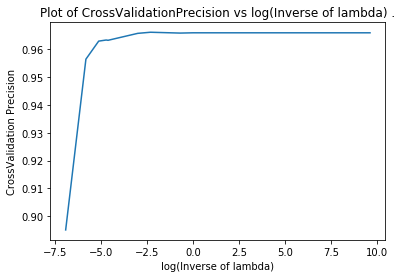

Starttime is : 2018-11-30 10:57:46.354374
Endtime   is : 2018-11-30 10:58:20.710647


In [38]:
# Import the LogisticRegression and precision modules.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Set the start time of the current cell run.
starttime_lr_w2v = datetime.datetime.now()

# Set the range for the hyper-parameters.
# We Know from theory:
#          when lambda = 0, then model overfits
#          when lambda tends to infinity , then model underfits

# Experiment with different combination of C ranges.
# Here C = Inverse(Lambda) where lambda is the hyper-parameter of the LR model
C = [0.001,0.003,0.006,0.009,0.01,0.05,0.10,0.50,1.0,1.5,10.0,15.0,100,150,1000,1500,10000,15000]
#C = [1.5,1.0,0.75,0.25,0.15,0.09,0.05,0.02,0.0015]
#C = [1500,150,15,1.5,0.15,0.015,0.0015,0.00015]
#C = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]



# Use the cross-validation dataset to determine the best hyper-parameter C.
# Loop through various values of C.
plot_X = []
plot_Y = []
for i in C:
    # Iterate through various values of C = inverse(lambda),
    lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                    C=(i),                   # use Inverse of Lambda.
                                    class_weight='balanced', # uses the values of y to automatically adjust
                                                             # weights in the input 
                                                             # data, as we have class imbalance.
                                    solver='saga')           # solver = 'saga' because of high dimension
                                                             # and L1 regularizer.
    
    lr_optimal.fit(X_train_stdzd, Y_train)                # fitting the Logistic Regression model on the
                                                          # training set.
    Y_pred = lr_optimal.predict(X_cv_stdzd)               # predict the response from the Logistic Regression
                                                          # model on the cv set.
    plot_X.append(round(np.log(i),4))                     # plot log(InverseOfLambda) "C" in the x-axis.
    plot_Y.append(round(precision_score(Y_cv,Y_pred),4))  # plot precision score in the y-axis.

#print X,Y
print(plot_X)
print(plot_Y)

# Plot X-axis = log(C),Y-axis = precision, to determine the best hyper-parameter.
plt.plot(plot_X,plot_Y)
plt.title("Plot of CrossValidationPrecision vs log(Inverse of lambda) .")  # Set the title of the plot.
plt.xlabel("log(Inverse of lambda)")                                       # Set the x label of the plot.
plt.ylabel("CrossValidation Precision")                                    # Set the y label of the plot.
plt.show()                                                                 # render the plot.

# Set the end time of the current cell run.
endtime_lr_w2v = datetime.datetime.now()

# Print the cell run duration.
print("Starttime is : {}".format(starttime_lr_w2v))
print("Endtime   is : {}".format(endtime_lr_w2v))

In [ ]:
# Lambda Range : [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]
# [11.5129, 9.2103, 6.9078, 4.6052, 2.3026, 0.0, -2.3026, -4.6052, -6.9078, -9.2103, -11.5129]
# [0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.9662, 0.9633, 0.8952, 0.0, 0.0]

# Lambda Range : [1500,150,15,1.5,0.15,0.015,0.0015,0.00015]
# [7.3132, 5.0106, 2.7081, 0.4055, -1.8971, -4.1997, -6.5023, -8.8049]
# [0.966, 0.966, 0.966, 0.966, 0.966, 0.964, 0.9331, 0.0]

# Lambda Range : [1.5,1.0,0.75,0.25,0.15,0.09,0.05,0.02,0.0015]
# [0.4055, 0.0, -0.2877, -1.3863, -1.8971, -2.4079, -2.9957, -3.912, -6.5023]
# [0.966, 0.966, 0.9661, 0.9661, 0.966, 0.9661, 0.9658, 0.9644, 0.9331]

# Lambda Range : [0.001,0.003,0.006,0.009,0.01,0.05,0.10,0.50,1.0,1.5,10.0,15.0,100,150,1000,1500,10000,15000]
# [-6.9078, -5.8091, -5.116, -4.7105, -4.6052, -2.9957, -2.3026, -0.6931, 0.0, 0.4055, 2.3026, 2.7081, 4.6052, 5.0106, 6.9078, 7.3132, 9.2103, 9.6158]
# [0.895, 0.9565, 0.963, 0.9634, 0.9633, 0.9658, 0.9662, 0.9659, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.966]



In [39]:
np.exp(0)

1.0

In [49]:
# Print the shape of the Input features X and class label Y for training and test set.
print("Trainingset      X: {}".format(X_train_stdzd.shape))
print("CVset            X: {}".format(X_cv_stdzd.shape))
print("Testset          X: {}".format(X_test_stdzd.shape))

print("Trainingset      Y: {}".format(Y_train.shape))
print("CVset            Y: {}".format(Y_cv.shape))
print("Testset          Y: {}".format(Y_test.shape))

Trainingset      X: (60000, 50)
CVset            X: (20000, 50)
Testset          X: (20000, 50)
Trainingset      Y: (60000,)
CVset            Y: (20000,)
Testset          Y: (20000,)


#### Error plots for varying combination of lambda ranges.

#### Lambda range : 0 to 15000

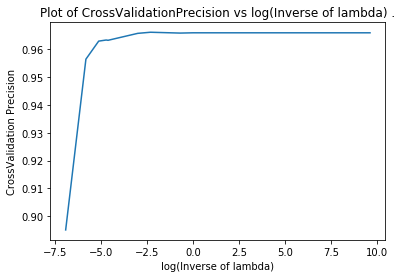

In [10]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_15000_AvgW2V_L1Reg.png')

#### Observations :
    We observe, the curve reaches a maximum value at lambda ~= 1.0 .
    Here lambda ranges from 0 to 15000.

#### Lambda Range : 0 to 1500

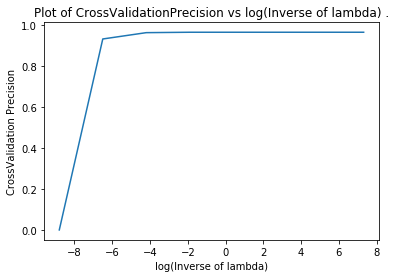

In [11]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_1500_AvgW2V_L1Reg.png')

#### Observations :
    We observe, the curve reached maximum when lambda = 1.50 .
    Here lambda ranges from 0 to 1500.

#### Lambda range : 0 to 1.50 

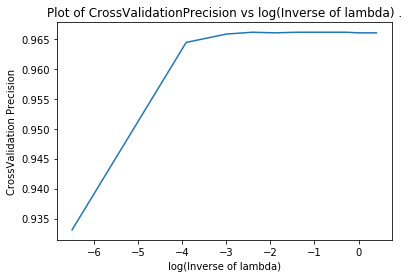

In [12]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_1dot5_AvgW2V_L1Reg.png')

#### Observations :
    The cross-validation precision is maximum when lambda ~= 0.15 .
    Here lambda ranges from 0 to 1.50.

#### Hyper-parameter Choice : 
      Based on the CV plots for varying combination of lambda ranges,lambda = 1.5, when lambda ranges between 0 and 1500 is the best choice.

#### Fit the Logistic Regression model in Word2Vec case in the test set and compute the error metrics.

In [50]:
# ============================== LR with lambda = optimal lambda ===============================================

# Set the start time of the current cell run.
starttime_lr_w2v = datetime.datetime.now()

# instantiate the Logistic Regression model with lambda = 1.50 based on the above error plots .
lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                C=(1.50),                # use Inverse of Lambda.
                                class_weight='balanced', # uses the values of y to automatically adjust
                                                         # weights in the input 
                                                         # data, since we have class imbalance.
                                solver='saga')           # solver = 'saga' because of high dimension and
                                                         # L1 regularizer.

lr_optimal.fit(X_train_stdzd, Y_train)           # fitting the Logistic Regression model.
Y_pred_test = lr_optimal.predict(X_test_stdzd)   # predict the response from the Logistic Regression
                                                 # model.

# Set the end time of the current cell run.
endtime_lr_w2v = datetime.datetime.now()

# Print the cell run duration.
print("Starttime : {}".format(starttime_lr_w2v))
print("Endtime   : {}".format(endtime_lr_w2v))

Starttime : 2018-11-30 17:48:44.757160
Endtime   : 2018-11-30 17:48:46.657421


#### Plot the classifier performance metrics.

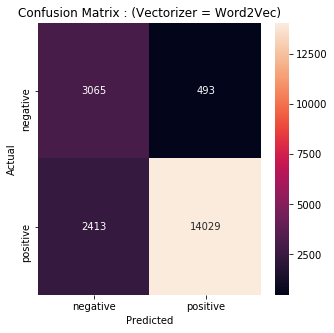

In [51]:
# evaluate the model and report the metrics.
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_pred_test)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d'
            ,xticklabels=['negative','positive'], yticklabels=['negative','positive'])
plt.title('Confusion Matrix : (Vectorizer = Word2Vec)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [52]:
#Class composition in the testset.
dfYTest = pd.DataFrame(list(Y_test),columns=['Comment'])
#print(list(Y_test))
print(dfYTest["Comment"].value_counts())

1    16442
0     3558
Name: Comment, dtype: int64


In [53]:
# Load the classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Load the prettytable
from prettytable import PrettyTable

# Instantiate the prettytable module.
x = PrettyTable()
# Set the column names for the table.
x.field_names = ["Text-VectorizationType","Performance Metric", "Value"]

# Add the classification metrics to the table.
x.add_row(['Word2Vec','Accuracy',accuracy_score(Y_test,Y_pred_test)])
x.add_row(['-','Precision',precision_score(Y_test,Y_pred_test)])
x.add_row(['-','Recall',recall_score(Y_test,Y_pred_test)])
x.add_row(['-','F1 Score',f1_score(Y_test,Y_pred_test)])
x.add_row(['-','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
x.add_row(['----------','-----------','----------'])

# Add the classification metrics to the final summary table.
summaryTable.add_row(['Word2Vec','1.50','Accuracy',accuracy_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','Precision',precision_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','Recall',recall_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','F1 Score',f1_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','1.50','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
summaryTable.add_row(['----------','-----------','----------','----------'])


# Apply data alignment.
x.align["Value"] = "l"

# Print the table.
print("Performance Metrics :")
print(x)

Performance Metrics :
+------------------------+--------------------+--------------------+
| Text-VectorizationType | Performance Metric | Value              |
+------------------------+--------------------+--------------------+
|        Word2Vec        |      Accuracy      | 0.8547             |
|           -            |     Precision      | 0.9660515080567414 |
|           -            |       Recall       | 0.8532416980902566 |
|           -            |      F1 Score      | 0.906149076346725  |
|           -            |  ConfusionMatrix   | [[ 3065   493]     |
|                        |                    |  [ 2413 14029]]    |
|       ----------       |    -----------     | ----------         |
+------------------------+--------------------+--------------------+


#### CONCLUSION :

#### Performance Metrics 

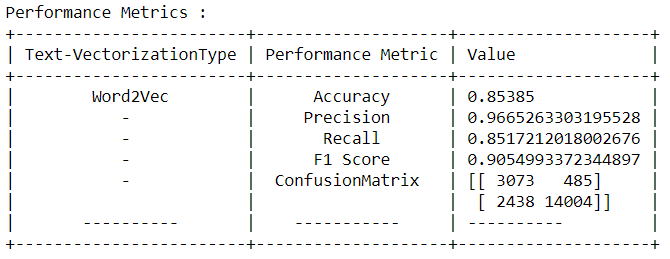

In [13]:
Image(filename='D:\Plot\ConfusionMatrix_L1Regularizer_AvgW2V.PNG')

#### We see good precision score for the LR model with L1 Regularizer. The FalsePositive values is acceptable while FalseNegative is a concern. The text review comment has been enriched by adding contents of summary column from the Amazon Food Reviews dataset.

### Vectorization Method : TermFrequency-InverseDocumentFrequency_ Weighted Word2Vector (TF-IDF W2V)

#### Convert review text into numeric vectors using TF-IDF_WW2F

In [54]:
#TF-IDF
# Apply TF-IDF vectorization only on the trainingset.
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))

#Train you tf-idf vectorizer on the train data.
final_tf_idf = tf_idf_vect.fit_transform(X_train.values.astype('U'))

#Print the details.
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (60000, 901762)
the number of unique words including both unigrams and bigrams  901762


#### Use the TF-IDF vectorizer trained in the preceding step to convert cross-validation and test set to vectors.

In [55]:
#use the same countvectorizer on the cross-validation set.
final_tf_idf_cvset = tf_idf_vect.transform(X_cv.values)

#Print the details.
print("the type of count vectorizer ",type(final_tf_idf_cvset))
print("the shape of out text TF-IDF vectorizer ",final_tf_idf_cvset.get_shape())
print("the number of unique words ", final_tf_idf_cvset.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TF-IDF vectorizer  (20000, 901762)
the number of unique words  901762


In [56]:
#use the same countvectorizer on the test set.
final_tf_idf_testset = tf_idf_vect.transform(X_test.values)

#Print the details.
print("the type of count vectorizer ",type(final_tf_idf_testset))
print("the shape of out text TF-IDF vectorizer ",final_tf_idf_testset.get_shape())
print("the number of unique words ", final_tf_idf_testset.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TF-IDF vectorizer  (20000, 901762)
the number of unique words  901762


In [57]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))

#### Build the list of sentences for the training set.

In [58]:
# Build the list of sentences from the training set.
list_of_sent=[]                           # List to store the sentences from the Review comments.
for sent in X_train.values.astype('U'):   # Loop through the Review comments, one at a time.
    list_of_sent.append(sent.split())     # Split the Review comments into sentences and store 
                                          # them in the List.

#### Build the list of sentences for the cross-validation set.

In [59]:
# Build the list of sentences from the cross-validation set.
list_of_sent_cv=[]                          # List to store the sentences from the Review comments.
for sent in X_cv.values:                    # Loop through the Review comments, one at a time.
    list_of_sent_cv.append(sent.split())    # Split the Review comments into sentences and store them
                                            # in the List.

#### Build the list of sentences for the test set.

In [60]:
# Build the list of sentences from the test set.
list_of_sent_test=[]                        # List to store the sentences from the Review comments.
for sent in X_test.values:                  # Loop through the Review comments, one at a time.
    list_of_sent_test.append(sent.split())  # Split the Review comments into sentences and store 
                                            # them in the List.

#### Train the Word2Vec model on the training set alone.

In [61]:
# min_count = 5 considers only words that occured atleast 5 times
# Word2Vec Syntax : Word2Vec(list,word_repeat_count,dimension_of_each_word_vector,Number_of_Processor_cores)

# Instantiate the Word2Vec vectorizer.
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
# Get the vocabulary. 
w2v_words = list(w2v_model.wv.vocab)
# Print the details.
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  10247
sample words  ['big', 'lover', 'fig', 'jam', 'uniqu', 'flavor', 'kind', 'mix', 'light', 'dark', 'mission', 'must', 'tri', 'awsom', 'great', 'product', 'good', 'price', 'definit', 'order', 'use', 'bottl', 'empti', 'excel', 'expect', 'box', 'full', 'fortun', 'cooki', 'like', 'one', 'nonetheless', 'got', 'small', 'tast', 'weird', 'okay', 'best', 'ever', 'review', 'amazon', 'check', 'label', 'contain', 'sure', 'enough', 'propylen', 'glycol', 'top', 'ingredi']


#### Train the TF-IDF Weighted Word2Vec on the training set.

In [62]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = [];              # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent):       # for each review/sentence 
    sent_vec = np.zeros(50)           # as word vectors are of zero length
    weight_sum =0;                    # num of words with a valid vector in the sentence/review
    for word in sent:                 # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]  # Vector representation of the word.
            
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf values of word in this review
            tfidf_avgw2v = dictionary[word]*(sent.count(word)/len(sent))   # Compute the weights for
                                                                           # Weighted Average.
            
            # Avg. Word2Vec = ((W2V(v1)*w1)+(W2V(v2)*w2)+(W2V(v3)*w3)+...... +(W2V(v364171)*w364171) / 
            #                  Sum(w1,w2,..w364171)            
            sent_vec += (vec * tfidf_avgw2v)  # Compute the numerator part of the above formula.
            weight_sum += tfidf_avgw2v        # Compute the denominator part of the above formula.
            
    if weight_sum != 0:
        sent_vec /= weight_sum                # Numerator/Denominator to get the Weighted Average.
    tfidf_sent_vectors.append(sent_vec)       # Add this to the List.
    row += 1

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [01:07<00:00, 885.76it/s]


#### Use the TF-IDF Weigthed Word2Vec model trained on training set to Cross-Validation set.

In [63]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_cv = [];              # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_cv):    # for each review/sentence 
    sent_vec = np.zeros(50)           # as word vectors are of zero length
    weight_sum =0;                    # num of words with a valid vector in the sentence/review
    for word in sent:                 # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]  # Vector representation of the word.
            
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf values of word in this review
            tfidf_avgw2v = dictionary[word]*(sent.count(word)/len(sent))   # Compute the weights for
                                                                           # Weighted Average.
            
            # Avg. Word2Vec = ((W2V(v1)*w1)+(W2V(v2)*w2)+(W2V(v3)*w3)+...... +(W2V(v364171)*w364171) /
            #                  Sum(w1,w2,..w364171)            
            sent_vec += (vec * tfidf_avgw2v)  # Compute the numerator part of the above formula.
            weight_sum += tfidf_avgw2v        # Compute the denominator part of the above formula.
            
    if weight_sum != 0:
        sent_vec /= weight_sum                # Numerator/Denominator to get the Weighted Average.
    tfidf_sent_vectors_cv.append(sent_vec)    # Add this to the List.
    row += 1

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:25<00:00, 795.88it/s]


#### Use the TF-IDF Weigthed Word2Vec model trained on training set to Test set.

In [64]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_test = [];              # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_test):  # for each review/sentence 
    sent_vec = np.zeros(50)           # as word vectors are of zero length
    weight_sum =0;                    # num of words with a valid vector in the sentence/review
    for word in sent:                 # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]  # Vector representation of the word.
            
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf values of word in this review
            tfidf_avgw2v = dictionary[word]*(sent.count(word)/len(sent))   # Compute the weights for
                                                                           # Weighted Average.
            
            # Avg. Word2Vec = ((W2V(v1)*w1)+(W2V(v2)*w2)+(W2V(v3)*w3)+...... +(W2V(v364171)*w364171) / 
            #                   Sum(w1,w2,..w364171)            
            sent_vec += (vec * tfidf_avgw2v)  # Compute the numerator part of the above formula.
            weight_sum += tfidf_avgw2v        # Compute the denominator part of the above formula.
            
    if weight_sum != 0:
        sent_vec /= weight_sum                # Numerator/Denominator to get the Weighted Average.
    tfidf_sent_vectors_test.append(sent_vec)  # Add this to the List.
    row += 1

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:24<00:00, 803.56it/s]


#### Standardize / Normalize the data

In [65]:
# Data-preprocessing: Normalizing the data
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

#Standardize on the train data.
X_train_stdzd = normalizer.fit_transform(tfidf_sent_vectors)

#Standardize the cv and test data.
X_cv_stdzd    = normalizer.transform(tfidf_sent_vectors_cv)    #use the same Normalizer on the cv set.
X_test_stdzd  = normalizer.transform(tfidf_sent_vectors_test)  #use the same Normalizer on the test set.

#### Hyper-Parameter Tuning : Using the cross-validation dataset to calculate the optimal 'lambda' of LogisticRegression in Avg-Word2Vec case.

[5.0106, 2.7081, 0.4055, -1.8971, -4.1997, -6.5023, -8.8049]
[0.9521, 0.9521, 0.952, 0.9519, 0.9505, 0.9204, 0.0]


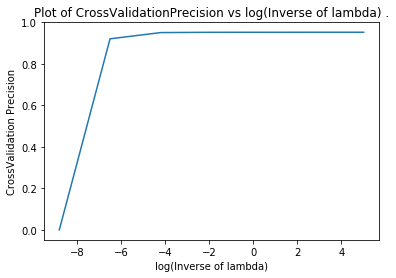

Starttime is : 2018-11-30 11:47:20.418578
Endtime   is : 2018-11-30 11:47:33.450845


In [70]:
# Import the LogisticRegression and precision modules.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Set the start time of the current cell run.
starttime_lr_avgw2v = datetime.datetime.now()

# Set the range for the hyper-parameters.
# We Know from theory:
#          when lambda = 0, then model overfits
#          when lambda tends to infinity , then model underfits

# Experiment with different combination of C ranges.
# Here C = Inverse(Lambda) where lambda is the hyper-parameter of the LR model
C = [150,15,1.5,0.15,0.015,0.0015,0.00015]
#C = [1500,150,100,50,25,12,6,3,2,1,0.1,0.01,0.001]
#C = [10000,1000,100,10,1,0.1,0.01,0.001]
#C = [1000000,100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]


# Use the cross-validation dataset to determine the best hyper-parameter C.
# Loop through various values of C.
plot_X = []
plot_Y = []
for i in C:
    # Iterate through various values of C = inverse(lambda),
    lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                    C=(i),                   # use Inverse of Lambda.
                                    class_weight='balanced', # uses the values of y to automatically adjust
                                                             # weights in the input 
                                                             # data, since we have class imbalance.
                                    solver='saga')           # solver = 'saga' because of high dimension and
                                                             # L1 regularizer.
    
    lr_optimal.fit(X_train_stdzd, Y_train)       # fitting the Logistic Regression model on the training set.
    Y_pred = lr_optimal.predict(X_cv_stdzd)      # predict the response from the Logistic Regression model on
                                                 # the cv set.
    plot_X.append(round(np.log(i),4))                         # plot log(InverseOfLambda) "C" in the x-axis.
    plot_Y.append(round(precision_score(Y_cv,Y_pred),4))      # plot precision score in the y-axis.

#print X,Y
print(plot_X)
print(plot_Y)

# Plot X-axis = log(C),Y-axis = precision, to determine the best hyper-parameter.
plt.plot(plot_X,plot_Y)
plt.title("Plot of CrossValidationPrecision vs log(Inverse of lambda) .")  # Set the title of the plot.
plt.xlabel("log(Inverse of lambda)")                                       # Set the x label of the plot.
plt.ylabel("CrossValidation Precision")                                    # Set the y label of the plot.
plt.show()                                                                 # render the plot.

# Set the end time of the current cell run.
endtime_lr_avgw2v = datetime.datetime.now()

# Print the cell run duration.
print("Starttime is : {}".format(starttime_lr_avgw2v))
print("Endtime   is : {}".format(endtime_lr_avgw2v))

In [ ]:
# Lambda Range : [1000000,100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]
# [13.8155, 11.5129, 9.2103, 6.9078, 4.6052, 2.3026, 0.0, -2.3026, -4.6052, -6.9078, -9.2103, -11.5129]
# [0.9521, 0.952, 0.9521, 0.9521, 0.9521, 0.952, 0.9519, 0.952, 0.95, 0.8847, 0.8238, 0.8238]

# Lambda Range : [10000,1000,100,10,1,0.1,0.01,0.001]
# [9.2103, 6.9078, 4.6052, 2.3026, 0.0, -2.3026, -4.6052, -6.9078]
# [0.9521, 0.9521, 0.9521, 0.952, 0.9519, 0.952, 0.95, 0.8844]

# Lambda Range : [1500,150,100,50,25,12,6,3,2,1,0.1,0.01,0.001]
# [7.3132, 5.0106, 4.6052, 3.912, 3.2189, 2.4849, 1.7918, 1.0986, 0.6931, 0.0, -2.3026, -4.6052, -6.9078]
# [0.9521, 0.9521, 0.9521, 0.9521, 0.9521, 0.952, 0.952, 0.952, 0.952, 0.9519, 0.952, 0.95, 0.8847]

# Lambda Range : [150,15,1.5,0.15,0.015,0.0015,0.00015]
# [5.0106, 2.7081, 0.4055, -1.8971, -4.1997, -6.5023, -8.8049]
# [0.9521, 0.9521, 0.952, 0.9519, 0.9505, 0.9204, 0.0]


In [66]:
# Print the shape of the Input features X and class label Y for training and test set.
print("Trainingset      X: {}".format(X_train_stdzd.shape))
print("CVset            X: {}".format(X_cv_stdzd.shape))
print("Testset          X: {}".format(X_test_stdzd.shape))

print("Trainingset      Y: {}".format(Y_train.shape))
print("CVset            Y: {}".format(Y_cv.shape))
print("Testset          Y: {}".format(Y_test.shape))

Trainingset      X: (60000, 50)
CVset            X: (20000, 50)
Testset          X: (20000, 50)
Trainingset      Y: (60000,)
CVset            Y: (20000,)
Testset          Y: (20000,)


#### Error plots for varying combination of lambda ranges.

#### Lambda range : 0 to 1000000

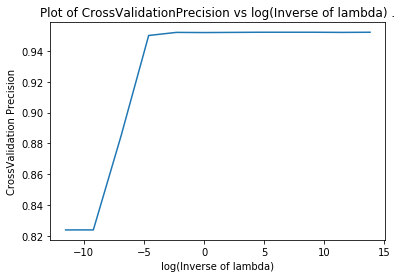

In [14]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_1M_TFIDF_AvgW2V_L1Reg.png')

#### Observations :
    We observe, the curve reaches a maximum value at lambda ~= 0.10 .
    Here lambda ranges from 0 to 1000000.

#### Lambda Range : 0 to 10000

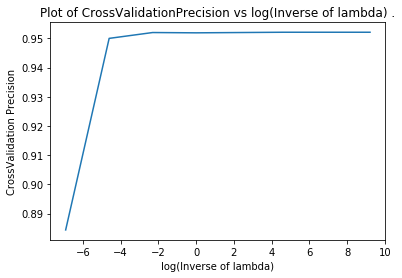

In [15]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_10K_TFIDF_AvgW2V_L1Reg.png')

#### Observations :
    We observe, the curve reached maximum when lambda ~= 0.10 .
    Here lambda ranges from 0 to 10000.

#### Lambda range : 0 to 150

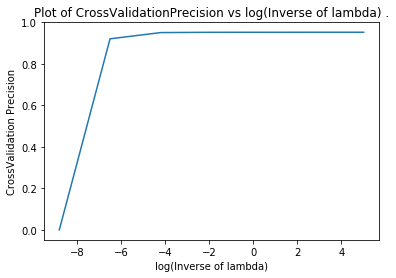

In [16]:
Image(filename='D:\Plot\Plot_CVPrecision_vs_Lambda_0_150_TFIDF_AvgW2V_L1Reg.png')

#### Observations :
    The cross-validation precision is maximum when lambda ~= 0.15 .
    Here lambda ranges from 0 to 150.

#### Hyper-parameter Choice : 
      Based on the CV plots for varying combination of lambda ranges;lambda =0.15,when lambda ranges between 0 and 150 is the best choice.

#### Fit the Logistic Regression model in Avg-Word2Vec case in the test set and compute the error metrics.

In [67]:
# ============================== LR with lambda = optimal lambda ===============================================

# Set the start time of the current cell run.
starttime_lr_avgw2v = datetime.datetime.now()

# instantiate the Logistic Regression model with lambda = 0.15 based on the above error plots .
lr_optimal = LogisticRegression(penalty='l1',            # use L1 regularizer.
                                C=(0.15),                # use Inverse of Lambda.
                                class_weight='balanced', # uses the values of y to automatically adjust
                                                         # weights in the input data.
                                solver='saga')           # solver = 'saga' because of high dimension and
                                                         # L1 regularizer.

lr_optimal.fit(X_train_stdzd, Y_train)           # fitting the Logistic Regression model.
Y_pred_test = lr_optimal.predict(X_test_stdzd)   # predict the response from the Logistic Regression model.

# Set the end time of the current cell run.
endtime_lr_avgw2v = datetime.datetime.now()

# Print the cell run duration.
print("Starttime : {}".format(starttime_lr_avgw2v))
print("Endtime   : {}".format(endtime_lr_avgw2v))

Starttime : 2018-11-30 17:53:24.791556
Endtime   : 2018-11-30 17:53:26.881278


#### Plot the classifier performance metrics.

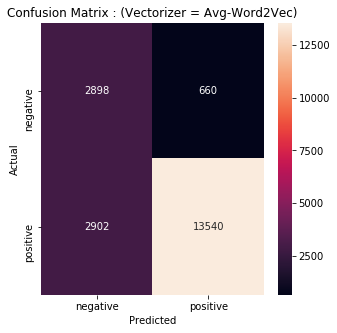

In [68]:
# evaluate the model and report the metrics.
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_pred_test)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d'
            ,xticklabels=['negative','positive'], yticklabels=['negative','positive'])
plt.title('Confusion Matrix : (Vectorizer = Avg-Word2Vec)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [69]:
#Class composition in the testset.
dfYTest = pd.DataFrame(list(Y_test),columns=['Comment'])
#print(list(Y_test))
print(dfYTest["Comment"].value_counts())

1    16442
0     3558
Name: Comment, dtype: int64


In [70]:
# Load the classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Load the prettytable
from prettytable import PrettyTable

# Instantiate the prettytable module.
x = PrettyTable()
# Set the column names for the table.
x.field_names = ["Text-VectorizationType","Performance Metric", "Value"]

# Add the classification metrics to the table.
x.add_row(['Avg-Word2Vec','Accuracy',accuracy_score(Y_test,Y_pred_test)])
x.add_row(['-','Precision',precision_score(Y_test,Y_pred_test)])
x.add_row(['-','Recall',recall_score(Y_test,Y_pred_test)])
x.add_row(['-','F1 Score',f1_score(Y_test,Y_pred_test)])
x.add_row(['-','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
x.add_row(['----------','-----------','----------'])

# Add the classification metrics to the final summary table.
summaryTable.add_row(['Avg-Word2Vec','0.15','Accuracy',accuracy_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.15','Precision',precision_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.15','Recall',recall_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.15','F1 Score',f1_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.15','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
summaryTable.add_row(['----------','-----------','----------','----------'])


# Apply data alignment.
x.align["Value"] = "l"

# Print the table.
print("Performance Metrics :")
print(x)

Performance Metrics :
+------------------------+--------------------+--------------------+
| Text-VectorizationType | Performance Metric | Value              |
+------------------------+--------------------+--------------------+
|      Avg-Word2Vec      |      Accuracy      | 0.8219             |
|           -            |     Precision      | 0.9535211267605633 |
|           -            |       Recall       | 0.8235007906580708 |
|           -            |      F1 Score      | 0.8837543241302787 |
|           -            |  ConfusionMatrix   | [[ 2898   660]     |
|                        |                    |  [ 2902 13540]]    |
|       ----------       |    -----------     | ----------         |
+------------------------+--------------------+--------------------+


#### CONCLUSION :

#### Performance Metrics 

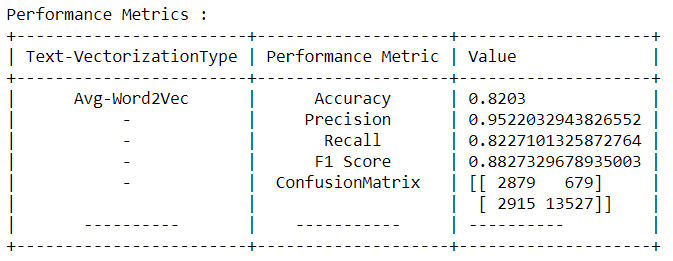

In [17]:
Image(filename='D:\Plot\ConfusionMatrix_L1Regularizer_TFIDF_AVGW2V.PNG')

#### We see good precision score for the LR model with L1 Regularizer. The FalsePositive values is acceptable while FalseNegative is a concern. The text review comment has been enriched by adding contents of summary column from the Amazon Food Reviews dataset.

### FINAL SUMMARY :

In [71]:
# Use a new prettytable to add BoW and tfidf rows.

# Apply data alignment.
summaryTable.align["Value"] = "l"
summaryTable.align["Hyper-Paramter(alpha)"] = "l"

# Print the table.
print("Summary :")
print(summaryTable)

Summary :
+------------------------+------------------------+--------------------+--------------------+
| Text-VectorizationType | Hyper-Paramter(lambda) | Performance Metric | Value              |
+------------------------+------------------------+--------------------+--------------------+
|          BoW           |          1.50          |      Accuracy      | 0.91375            |
|           -            |          1.50          |     Precision      | 0.9758163595215001 |
|           -            |          1.50          |       Recall       | 0.9178323804889916 |
|           -            |          1.50          |      F1 Score      | 0.9459366283260727 |
|           -            |          1.50          |  ConfusionMatrix   | [[ 3184   374]     |
|                        |                        |                    |  [ 1351 15091]]    |
|       ----------       |      -----------       |     ----------     | ----------         |
|         TFIDF          |          1.50          

#### Concluding Summary : 
#### Based on the observations from the above table, the vectorizer "Bag of Words" gives us the optimal metrics for the Logistic Regression Model.